In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
Salary_train = pd.read_csv('D:/ExcelRassignments/Assignment17/SalaryData_Train(1).csv')
Salary_test = pd.read_csv('D:/ExcelRassignments/Assignment17/SalaryData_Test(1).csv')

## Combined Dataset

In [4]:
import os 
import glob

In [5]:
extension ='csv'
all_filenames = [ i for i in glob.glob('*.{}'.format(extension))]

Salary_Data = pd.concat([Salary_train, Salary_test])
Salary_Data.to_csv('Salary_Data.csv', index=False, encoding='utf-8-sig')

In [6]:
Salary_Data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## EDA

In [7]:
salary_df = Salary_Data.copy()

In [8]:
salary_df1=salary_df.drop(['age', 'educationno', 'hoursperweek', 'native', 'capitalgain', 'capitalloss', 'hoursperweek'], axis=1)

In [9]:
salary_df1.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K


In [10]:
salary_df1= salary_df1.rename({'Salary':'salary'}, axis=1)

In [11]:
salary_df1.shape

(45221, 8)

In [12]:
salary_df1[salary_df1.duplicated()].shape

(36044, 8)

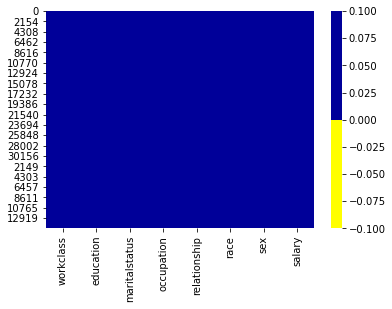

In [13]:
cols = salary_df1.columns
colors = ['#ffff00', '#000099']
sns.heatmap(salary_df1[cols].isnull(), cmap=sns.color_palette(colors))
plt.show()

In [14]:
import sweetviz as sv
sweet_report = sv.analyze(salary_df1)
sweet_report.show_html('SalaryData_EDA_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report SalaryData_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Label Encoder

In [15]:
labelencoder = LabelEncoder()

In [16]:
cols1 = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'salary']

In [17]:
salary_df1[cols1]= salary_df1[cols1].apply(LabelEncoder().fit_transform)

In [18]:
salary_df1.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,salary
0,5,9,4,0,1,4,1,0
1,4,9,2,3,0,4,1,0
2,2,11,0,5,1,4,1,0
3,2,1,2,5,0,2,1,0
4,2,9,2,9,5,2,0,0


## Splitting data into Training and Testing Dataset

In [19]:
x = salary_df1.iloc[:, 0:8]
y = salary_df1['salary']

In [20]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.333011)

In [21]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((30161, 8), (15060, 8), (15060,), (30161,))

## Grid Search CV

In [22]:
clf = SVC(C=15, gamma=50)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy =', acc)
confusion_matrix(y_test, y_pred)

Accuracy = 97.01859229747676


array([[11321,     0],
       [  449,  3290]], dtype=int64)

## RBF

In [23]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)
pred_rbf= model_rbf.predict(x_test)

In [24]:
np.mean(pred_rbf==y_test)

1.0

## Polynomial

In [25]:
model_poly = SVC(kernel='poly')
model_poly.fit(x_train, y_train)
pred_poly = model_poly.predict(x_test)

In [26]:
np.mean(pred_poly==y_test)

0.997078353253652

## Interpretation

### 97% data have been classifed correctly as per accuracy